In [ ]:
from PIL import ImageTk, Image
import pixellib
from pixellib.semantic import semantic_segmentation
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import torchvision.transforms as T

In [ ]:
segment_image = semantic_segmentation()
segment_image.load_ade20k_model("deeplabv3_xception65_ade20k.h5")

In [ ]:
##segment an image
segmap, seg_overlay = segment_image.segmentAsAde20k("/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/active-cold-female-girl-41371.jpg", overlay = False)
#cv2.imwrite("/home/mohamed.boudjoghra/assignements/AI701/project/prediction/img.jpg", seg_overlay)

In [ ]:

## getting the prediction
person_mask = np.zeros(seg_overlay.shape)
person_mask[np.array(segmap['class_colors'])[np.array(segmap['class_names'])=='person']==seg_overlay] = seg_overlay[np.array(segmap['class_colors'])[np.array(segmap['class_names'])=='person']==seg_overlay][0]
person_mask=np.average(person_mask, axis = 2)
person_mask*=(1.0/np.amax(person_mask))

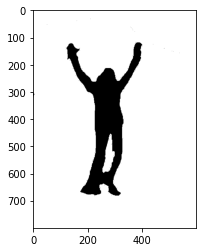

In [ ]:
plt.imshow(person_mask,cmap = plt.cm.binary)

In [ ]:
def IoU_coeff(y_true, y_pred):
    axes = (0,1) 
    intersection = np.sum(np.abs(y_pred * y_true), axis=axes) 
    mask = np.sum(np.abs(y_true), axis=axes) + np.sum(np.abs(y_pred), axis=axes)
    union = mask - intersection
    smooth = .001
    iou = (intersection + smooth) / (union + smooth)
    return iou

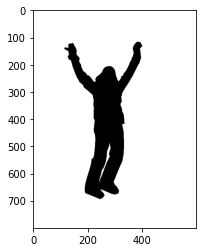

In [ ]:
import matplotlib.pyplot as plt
path = r'/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/masks/active-cold-female-girl-41371.png' 
# Using cv2.imread() method
ground_truth = cv2.imread(path, 0)
ground_truth=np.float64(ground_truth)*(1.0/np.amax(ground_truth))
ground_truth=ground_truth
plt.imshow(ground_truth,cmap = plt.cm.binary)

In [ ]:
IoU_coeff(ground_truth, person_mask)

0.8268912093528097

In [ ]:
ground_truth.shape

(800, 600)

In [ ]:
path = "/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/"
files = os.listdir(path)

In [ ]:
files 

['pexels-photo-68721.jpg',
 'pexels-photo-698555.jpg',
 'pexels-photo-346831.jpg',
 'football-american-football-player-sport-163530.jpg',
 'pexels-photo-261385_P12XypOYkI.jpg',
 'pexels-photo-723486.jpg',
 'pexels-photo-836866.jpg',
 'pexels-photo-743715.jpg',
 'pexels-photo-377945.jpg',
 'pexels-photo-551594_s3j2gSH1PO.jpg',
 'pexels-photo-698584.jpg',
 'pexels-photo-863859.jpg',
 'pexels-photo-428375.jpg',
 'pexels-photo-416405.jpg',
 'pexels-photo-815470.jpg',
 'pexels-photo-274797.jpg',
 'pexels-photo-764356.jpg',
 'pexels-photo-373903.jpg',
 'pexels-photo-693776.jpg',
 'pexels-photo-803985.jpg',
 'pexels-photo-569314.jpg',
 'pexels-photo-776942.jpg',
 'pexels-photo-547557.jpg',
 'pexels-photo-206514.jpg',
 'pexels-photo-815528.jpg',
 'pexels-photo-460506.jpg',
 'pexels-photo-236220.jpg',
 'pexels-photo-220139.jpg',
 'pexels-photo-585825.jpg',
 'person-young-man-beard-emotions-157966.jpg',
 'pexels-photo-234575.jpg',
 'pexels-photo-219642.jpg',
 'pexels-photo-842155.jpg',
 'pexels-

In [ ]:
print(os.path.join(path, '/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/', files[0]))

/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-68721.jpg


In [ ]:
for i in files:
    print(i)
    test_path = os.path.join(path, '/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/', i)
    print(test_path)
    
    #segmap, seg_overlay = segment_image.segmentAsAde20k("test_path", overlay = False)

pexels-photo-68721.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-68721.jpg
pexels-photo-698555.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-698555.jpg
pexels-photo-346831.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-346831.jpg
football-american-football-player-sport-163530.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/football-american-football-player-sport-163530.jpg
pexels-photo-261385_P12XypOYkI.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-261385_P12XypOYkI.jpg
pexels-photo-723486.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-723486.jpg
pexels-photo-836866.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-836866

pexels-photo-835517.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-835517.jpg
pexels-photo-428363.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-428363.jpg
pexels-photo-360419.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-360419.jpg
pexels-photo-192448.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-192448.jpg
pexels-photo-618544.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-618544.jpg
pexels-photo-165522.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-165522.jpg
pexels-photo-804002.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-804002.jpg
pexels-photo-541524.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3

pexels-photo-167503.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-167503.jpg
pexels-photo-878677.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-878677.jpg
pexels-photo-206610.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-206610.jpg
pexels-photo-341971.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-341971.jpg
pexels-photo-768454.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-768454.jpg
pexels-photo-193042.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-193042.jpg
pexels-photo-219597.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-219597.jpg
pexels-photo-97218.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+

pexels-photo-355018.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-355018.jpg
pexels-photo-172366.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-172366.jpg
girl-sitting-water-jetty-395713.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/girl-sitting-water-jetty-395713.jpg
pexels-photo-566454.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-566454.jpg
pexels-photo-716421.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-716421.jpg
pexels-photo-756560_1aYWmZaElC.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-756560_1aYWmZaElC.jpg
pexels-photo-573239.jpg
/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-573239.jpg
pexels-photo-206326.jpg

In [ ]:
files[0]

'pexels-photo-68721.jpg'

In [ ]:
random_crop_t = T.Compose(
    [T.PILToTensor(), 
    T.RandomCrop(size=(550, 550)),
    T.ToPILImage()]
)

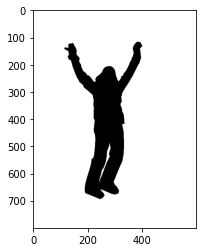

In [ ]:
for i in ['pexels-photo-68721.jpg', 'pexels-photo-698555.jpg', 'pexels-photo-346831.jpg']:
    test_path = os.path.join(path, '/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/', i)
    cv2.imread(test_path,0)
    ground_truth=np.float64(ground_truth)*(1.0/np.amax(ground_truth))
    ground_truth=ground_truth
    plt.imshow(ground_truth,cmap = plt.cm.binary)

<class 'PIL.Image.Image'>


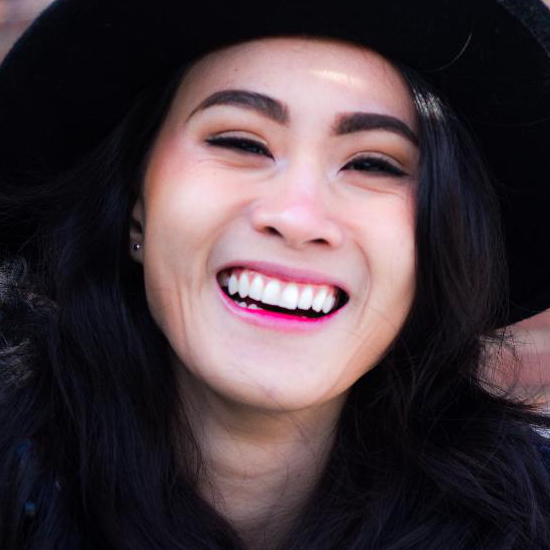

<class 'PIL.Image.Image'>


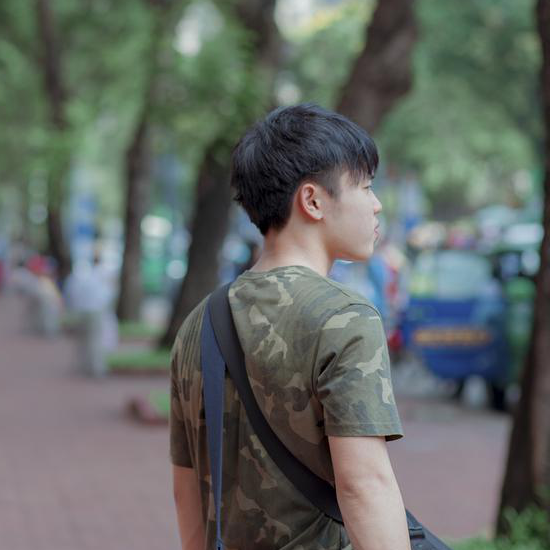

<class 'PIL.Image.Image'>


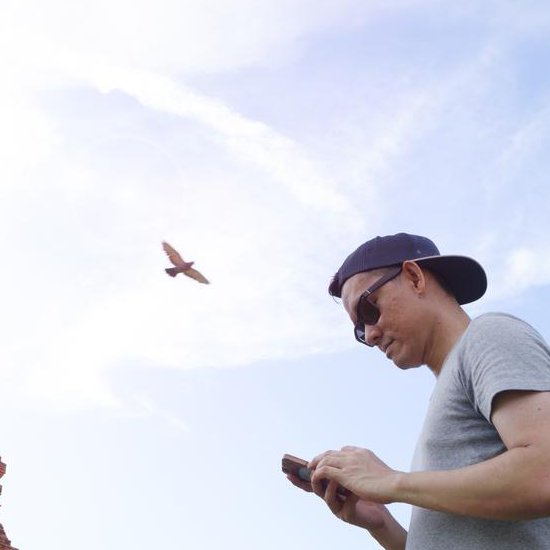

In [ ]:
for i in ['pexels-photo-68721.jpg', 'pexels-photo-698555.jpg', 'pexels-photo-346831.jpg']:
    test_path = os.path.join(path, '/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/', i)
    img = Image.open(test_path)
    crop_img_path = os.path.join(path, '/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/crop/images/', i)
    random = random_crop_t(img)
    print(type(random))
    random.save(crop_img_path, 'JPEG')
    display(random)

#salt and pepper noise 

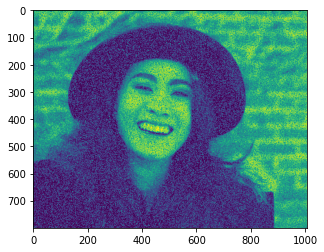

In [ ]:
import numpy as np
import random
import cv2

def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

image = cv2.imread('/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-68721.jpg',0) # Only for grayscale image
noise_img = sp_noise(image,0.09)
cv2.imwrite('sp_noise.jpg', noise_img)

plt.imshow(noise_img)

In [ ]:
img_path = '/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images/pexels-photo-68721.jpg'

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def gaussian_noise(img_path,scale):

    img = cv2.imread(img_path)[...,::-1]/255.0
    noise =  np.random.normal(loc=0,scale=scale, size=img.shape)

    # noise overlaid over image
    noisy = np.clip((img + noise*0.2),0,1)
    noisy2 = np.clip((img + noise*0.4),0,1)
    return noisy2

AttributeError: 'numpy.ndarray' object has no attribute 'type'

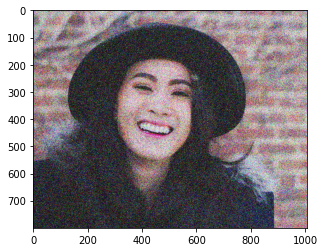

In [ ]:
plt.imshow(gaussian_noise(img_path,1))
print(gaussian_noise(img_path,1).type)

**Salt and Pepper test Loop**

In [ ]:
for i in files:
    test_path = os.path.join(path, '/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images', i)
    img = cv2.imread(test_path,0)
    crop_img_path = os.path.join(path, '/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/Salt_n_pepper/0.1', i)
    salt_n_pepper = sp_noise(img,0.1)
    im = Image.fromarray(np.uint8(cm.gist_earth(salt_n_pepper)*255))
    #im.save(crop_img_path, 'JPEG')
    im = im.convert('RGB')
    #print(im.size)
    im.save(crop_img_path,'JPEG')
    #plt.imshow(im)

**Gaussion Noise Test Loop**

In [ ]:
for x in ['1.0','2.5','5.0']:
    for i in files:
        test_path = os.path.join(path, '/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/images', i)
        #img = cv2.imread(test_path,0)
        crop_img_path = os.path.join(path, '/home/muhammad.huzaifa/Test_scripts/Deeplabv3+/amine-work/people_segmentation/Gauss_noise', str(x))
        crop_img_path = os.path.join(path, crop_img_path , i)
        x = float(x)
        gauss = gaussian_noise(test_path,x)
        print(type(gauss), gauss.shape)
        #cv2.imwrite(crop_img_path,gauss)
        #gauss = gauss.astype(np.uint8)
    #     im = Image.fromarray(gauss,"RGB")
        plt.imsave(f"{crop_img_path}", gauss)
        #plt.imshow(gauss)
        #gauss.save(crop_img_path, 'JPEG')
        #im.save(crop_img_path, 'JPEG')
        #im = im.convert('RGB')
        #print(im.size)
        #im.save(crop_img_path,'JPEG')

<class 'numpy.ndarray'> (800, 1006, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (1024, 731, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 530, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (706, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (697, 1024, 3)
<class 'numpy.ndarray'> (800, 640, 3)
<class 'numpy.ndarray'> (640, 1024, 3)
<class 'numpy.ndarray'> (719, 1023, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (505, 1024, 3)
<class 'numpy.ndarray'> (651, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (653, 1024, 3)
<class 'numpy.ndarray'> (800, 523, 3)
<class 'numpy.ndarray'> (682, 1

<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 799, 3)
<class 'numpy.ndarray'> (1023, 1023, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 919, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (742, 1024, 3)
<class 'numpy.ndarray'> (800, 540, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (800, 530, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 

<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (707, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 490, 3)
<class 'numpy.ndarray'> (693, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (612, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 516, 3)
<class 'numpy.ndarray'> (638, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 53

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (767, 1024, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 1000, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (706, 1024, 3)
<class 'numpy.ndarray'> (495, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (767, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683,

<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (800, 531, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 537, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (767, 1024, 3)
<class 'numpy.ndarray'> (800, 708, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (631, 1024, 3)
<class 'numpy.ndarray'> (701, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (769, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (731, 1024, 3)
<class 'numpy.ndarray'> (574, 102

<class 'numpy.ndarray'> (618, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 377, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (616, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (573, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 583, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (667, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (819, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (685, 1023, 3)
<class 'numpy.ndarray'> (412, 1024, 3)
<class 'numpy.ndarray'> (767, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 530, 3)
<class 'numpy.ndarray'> (683, 10

<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (698, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (633, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (613, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (767, 1024, 3)
<class 'numpy.ndarray'> (718, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (712, 1024, 3)
<class 'numpy.ndarray'> (800, 736, 3)
<class 'numpy.ndarray'> (800, 1000, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682,

<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (1023, 577, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (574, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (634, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (800, 531, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (640, 1

<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (756, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (618, 1024, 3)
<class 'numpy.ndarray'> (676, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 569, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 529, 3)
<class 'numpy.ndarray'> (800, 508, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (1023, 682, 3)
<class 'numpy.ndarray'> (755, 1024, 3)
<class 'numpy.ndarray'> (703, 1024, 3)
<class 'numpy.ndarray'> (712, 1024, 3)
<class 'numpy.ndarray'> (800, 53

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (786, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 5

<class 'numpy.ndarray'> (717, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (750, 1024, 3)
<class 'numpy.ndarray'> (444, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (751, 1024, 3)
<class 'numpy.ndarray'> (800, 810, 3)
<class 'numpy.ndarray'> (793, 1024, 3)
<class 'numpy.ndarray'> (800, 880, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 526, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 628, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (1024, 819, 3)
<class 'numpy.ndarray'> (800, 533, 3)

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (800, 601, 3)
<class 'numpy.ndarray'> (749, 1024, 3)
<class 'numpy.ndarray'> (723, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (707, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 644, 3)
<class 'numpy.ndarray'> (800, 568, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (815, 1024, 3)
<class 'numpy.ndarray'> (800, 633, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (682, 1024,

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (723, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (679, 1024, 3)
<class 'numpy.ndarray'> (800, 884, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (731, 1024, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (710, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (688, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (661, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (627, 1

<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 679, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (523, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (672, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 870, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (685, 1023, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (767, 1024, 3)
<class 'numpy.ndarray'> (731, 1024, 3)
<class 'numpy.ndarray'> (800, 870, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (682, 1024,

<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (731, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (767, 1024, 3)
<class 'numpy.ndarray'> (1024, 664, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 901, 3)
<class 'numpy.ndarray'> (672, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (721, 1024, 3)
<class 'numpy.ndarray'> (676, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800,

<class 'numpy.ndarray'> (641, 1024, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (800, 640, 3)
<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (752, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 544, 3)
<class 'numpy.ndarray'> (472, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 498, 3)
<class 'numpy.ndarray'> (757, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (723, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 531, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (682, 10

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (684, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (603, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (654, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (767, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (726, 

<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (674, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (615, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1023, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (767, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (774, 1024, 3)
<class 'numpy.ndarray'> (800, 495, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 591, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (800, 639, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (1024, 678, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (661, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (800, 584, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (640, 1024

<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (667, 1024, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (605, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (606, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (714, 10

<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (1024, 576, 3)
<class 'numpy.ndarray'> (652, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (732, 1024, 3)
<class 'numpy.ndarray'> (800, 530, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (800, 1006, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 631, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (680, 

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 531, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (800, 644, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (377, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 892, 3)
<class 'numpy.ndarray'> (743, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (833, 1024

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (574, 1023, 3)
<class 'numpy.ndarray'> (635, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (653, 1024, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (701, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (745, 1024, 3)
<class 'numpy.ndarray'> (800, 573, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 6

<class 'numpy.ndarray'> (800, 531, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (790, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (685, 1023, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (711, 1024, 3)
<class 'numpy.ndarray'> (767, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (711, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (685, 1023, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (440, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (682, 10

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 537, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (637, 1024, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682,

<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (767, 1024, 3)
<class 'numpy.ndarray'> (704, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (649, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 524, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (660, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (675, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 53

<class 'numpy.ndarray'> (588, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (679, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (602, 1024, 3)
<class 'numpy.ndarray'> (720, 1024, 3)
<class 'numpy.ndarray'> (800, 535, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (625, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 511, 3)
<class 'numpy.ndarray'> (800, 53

<class 'numpy.ndarray'> (388, 1024, 3)
<class 'numpy.ndarray'> (673, 1024, 3)
<class 'numpy.ndarray'> (731, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 553, 3)
<class 'numpy.ndarray'> (620, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 536, 3)
<class 'numpy.ndarray'> (800, 628, 3)
<class 'numpy.ndarray'> (600, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (744, 1024, 3)
<class 'numpy.ndarray'> (800, 529, 3)
<class 'numpy.ndarray'> (1024, 768, 3)
<class 'numpy.ndarray'> (560, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (712, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (681, 1024

<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (689, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (691, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 682, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (604, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (776, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (650, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (767, 1024

<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 535, 3)
<class 'numpy.ndarray'> (626, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (571, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 450, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (617, 1024, 3)
<class 'numpy.ndarray'> (800, 957, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (701, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (1023,

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 530, 3)
<class 'numpy.ndarray'> (800, 1013, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (574, 1023, 3)
<class 'numpy.ndarray'> (800, 530, 3)
<class 'numpy.ndarray'> (663, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (637, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (624, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (736, 1024, 3)
<class 'numpy.ndarray'> (654, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (703, 1024, 3)
<class 'numpy.ndarray'> (684, 1024, 3)
<class 'numpy.ndarray'> (562, 1

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 470, 3)
<class 'numpy.ndarray'> (662, 1023, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 386, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 640, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (629, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 640, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 510, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (575, 1024, 3)
<class 'numpy.ndarray'> (683, 1024,

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (633, 1024, 3)
<class 'numpy.ndarray'> (640, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 574, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 680, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (667, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 

<class 'numpy.ndarray'> (730, 1023, 3)
<class 'numpy.ndarray'> (716, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (634, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (679, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (644, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (630, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (684, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (682, 

<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 521, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (732, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (771, 1024, 3)
<class 'numpy.ndarray'> (550, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (667, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (697, 1024, 3)
<class 'numpy.ndarray'> (800, 547, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (576, 10

<class 'numpy.ndarray'> (624, 1024, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 746, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (644, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (800, 571, 3)
<class 'numpy.ndarray'> (670, 1024, 3)
<class 'numpy.ndarray'> (668, 1024, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024,

<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (672, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (630, 1024, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (800, 531, 3)
<class 'numpy.ndarray'> (800, 530, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (566, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (691, 1024, 3)
<class 'numpy.ndarray'> (689, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (574, 1023, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (616, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 10

<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 530, 3)
<class 'numpy.ndarray'> (800, 640, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (670, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (619, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (764, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (667, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 80

<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (709, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (717, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (686, 1024, 3)
<class 'numpy.ndarray'> (750, 1024, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (800, 543, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (800, 1001, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (660, 1024

<class 'numpy.ndarray'> (577, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 666, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 563, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (685, 1023, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 53

<class 'numpy.ndarray'> (780, 1024, 3)
<class 'numpy.ndarray'> (652, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 640, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 640, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (685, 1023, 3)
<class 'numpy.ndarray'> (769, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (597, 1023, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (678, 1

<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 531, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (648, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (767, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533,

<class 'numpy.ndarray'> (512, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 536, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (578, 1024, 3)
<class 'numpy.ndarray'> (684, 1024, 3)
<class 'numpy.ndarray'> (800, 506, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (1024, 768, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (688, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (800, 533

<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (800, 987, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (731, 1024, 3)
<class 'numpy.ndarray'> (663, 1024, 3)
<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (640, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 566, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (684, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (800, 645, 3)
<class 'numpy.ndarray'> (800, 803, 3)
<class 'numpy.ndarray'> (800, 500, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (730, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (693, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (721, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (685, 1023, 3)
<class 'numpy.ndarray'> (575, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 531, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1

<class 'numpy.ndarray'> (635, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (448, 1024, 3)
<class 'numpy.ndarray'> (690, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 639, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (277, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (731, 1024, 3)
<class 'numpy.ndarray'> (1024, 683, 3)
<class 'numpy.ndarray'> (635, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (723, 1024, 3)
<class 'numpy.ndarray'> (684, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (800, 531, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (1024,

<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 551, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 531, 3)
<class 'numpy.ndarray'> (800, 506, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 529, 3)
<class 'numpy.ndarray'> (538, 1024, 3)
<class 'numpy.ndarray'> (632, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (515, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 

<class 'numpy.ndarray'> (800, 993, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (684, 1024, 3)
<class 'numpy.ndarray'> (722, 1024, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (561, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (575, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (698, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 537, 3)
<class 'numpy.ndarray'> (682,

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (671, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 989, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (674, 1023, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (654, 1024, 3)
<class 'numpy.ndarray'> (588, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 640, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (1024, 576, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (681, 10

<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (516, 1024, 3)
<class 'numpy.ndarray'> (666, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (571, 1023, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 530, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (645, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (711, 1024, 3)
<class 'numpy.ndarray'> (682, 

<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (758, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1023, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 530, 3)
<class 'numpy.ndarray'> (716, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (800, 896, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 10

<class 'numpy.ndarray'> (800, 530, 3)
<class 'numpy.ndarray'> (1023, 819, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (730, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (762, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (703, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 727, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 531, 3)
<class 'numpy.ndarray'> (678, 10

<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (627, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (640, 1024, 3)
<class 'numpy.ndarray'> (734, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 1020, 3)
<class 'numpy.ndarray'> (759, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 768, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (574, 1024, 3)
<class 'numpy.ndarray'> (800, 533,

<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (731, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 604, 3)
<class 'numpy.ndarray'> (800, 938, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (1024, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (609, 1024, 3)
<class 'numpy.ndarray'> (739, 1024, 3)
<class 'numpy.ndarray'> (800, 571, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 860, 3)
<class 'numpy.ndarray'> (682, 10

<class 'numpy.ndarray'> (687, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (767, 1024, 3)
<class 'numpy.ndarray'> (636, 1023, 3)
<class 'numpy.ndarray'> (630, 1023, 3)
<class 'numpy.ndarray'> (800, 530, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 573, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (575, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (634, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (800, 1018, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 571, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (800, 533

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (433, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 773, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 53

<class 'numpy.ndarray'> (767, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (529, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (685, 1023, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (646, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (527, 1024, 3)
<class 'numpy.ndarray'> (800, 742, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682,

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 480, 3)
<class 'numpy.ndarray'> (694, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 521, 3)
<class 'numpy.ndarray'> (800, 651, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (712, 1024, 3)
<class 'numpy.ndarray'> (800, 602, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (685, 1023, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (665, 1024, 3)
<class 'numpy.ndarray'> (678, 1

<class 'numpy.ndarray'> (698, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (721, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (744, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (682, 1024,

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (735, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (701, 1024, 3)
<class 'numpy.ndarray'> (698, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 1000, 3)
<class 'numpy.ndarray'> (752, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 926, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (1024, 864, 3)
<class 'numpy.ndarray'> (731, 

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (657, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (691, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (586, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (603, 1024, 3)
<class 'numpy.ndarray'> (719, 1024, 3)
<class 'numpy.ndarray'> (666, 1024, 3)
<class 'numpy.ndarray'> (682, 1

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (684, 1024, 3)
<class 'numpy.ndarray'> (769, 1024, 3)
<class 'numpy.ndarray'> (574, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 484, 3)
<class 'numpy.ndarray'> (684, 1024, 3)
<class 'numpy.ndarray'> (652, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (724, 1024, 3)
<class 'numpy.ndarray'> (622, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (709, 1024, 3)
<class 'numpy.ndarray'> (800, 937, 3)
<class 'numpy.ndarray'> (682,

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 531, 3)
<class 'numpy.ndarray'> (697, 1024, 3)
<class 'numpy.ndarray'> (684, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (613, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 571, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (591, 1024, 3)
<class 'numpy.ndarray'> (800, 746, 3)
<class 'numpy.ndarray'> (588, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (1024, 768, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 530, 3)
<class 'numpy.ndarray'> (764, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (576, 1024

<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 518, 3)
<class 'numpy.ndarray'> (800, 614, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 898, 3)
<class 'numpy.ndarray'> (654, 1024, 3)
<class 'numpy.ndarray'> (1024, 704, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 531, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (716, 1024, 3)
<class 'numpy.ndarray'> (543, 1024, 3)
<class 'numpy.ndarray'> (648, 1024, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (682, 102

<class 'numpy.ndarray'> (767, 1024, 3)
<class 'numpy.ndarray'> (800, 571, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 542, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 632, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (577, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (744, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024,

<class 'numpy.ndarray'> (800, 450, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (668, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (663, 1024, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (684, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 916, 3)
<class 'numpy.ndarray'> (800, 548, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (767, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (762, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (767, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (669, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (800, 582, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (1024, 731, 3)
<class 'numpy.ndarray'> (800, 55

<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (767, 1024, 3)
<class 'numpy.ndarray'> (649, 1024, 3)
<class 'numpy.ndarray'> (717, 1024, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (563, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (584, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 531, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 844, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (800, 597, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (698, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (640, 1024, 3)
<class 'numpy.ndarray'> (609, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 1000, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (558, 1024, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (649, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (683, 1

<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (608, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (800, 590, 3)
<class 'numpy.ndarray'> (800, 967, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (1024, 680, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 1016, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 601, 3)
<class 'numpy.ndarray'> (601, 1023, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (575, 1024, 3)
<class 'numpy.ndarray'> (682, 10

<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (656, 1024, 3)
<class 'numpy.ndarray'> (655, 1023, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 660, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (684, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 531, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (1024, 640, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 646, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 639, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 5

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (1024, 778, 3)
<class 'numpy.ndarray'> (624, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (660, 1024, 3)
<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (751, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (757, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 530, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (548, 1024, 3)
<class 'numpy.ndarray'> (667, 1024, 3)
<class 'numpy.ndarray'> (682, 10

<class 'numpy.ndarray'> (800, 640, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (512, 1024, 3)
<class 'numpy.ndarray'> (800, 983, 3)
<class 'numpy.ndarray'> (767, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (1024, 768, 3)
<class 'numpy.ndarray'> (676, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (435, 1023, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (667, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (682,

<class 'numpy.ndarray'> (654, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (523, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (730, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (800, 535, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (686, 1024, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (767, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (706,

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 554, 3)
<class 'numpy.ndarray'> (576, 1024, 3)
<class 'numpy.ndarray'> (709, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (800, 532, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (575, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (729, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 529, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (763,

<class 'numpy.ndarray'> (751, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (573, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 898, 3)
<class 'numpy.ndarray'> (678, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 571, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 881, 3)
<class 'numpy.ndarray'> (682, 10

<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (639, 1024, 3)
<class 'numpy.ndarray'> (592, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (1024, 682, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (1024, 680, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (800, 818, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 534, 3)
<class 'numpy.ndarray'> (800, 711, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (660, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (705, 1024, 3)
<class 'numpy.ndarray'> (687, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 531, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (732, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (576, 1024,

<class 'numpy.ndarray'> (767, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (1024, 640, 3)
<class 'numpy.ndarray'> (694, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (768, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 449, 3)
<class 'numpy.ndarray'> (800, 639, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (732, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (767, 10

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (649, 1024, 3)
<class 'numpy.ndarray'> (1024, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 450, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (653, 1024, 3)
<class 'numpy.ndarray'> (680, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 600, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (723, 1024, 3)
<class 'numpy.ndarray'> (681, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (498, 1024, 3)
<class 'numpy.ndarray'> (800, 

<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 827, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (1024, 756, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 800, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (595, 1023, 3)
<class 'numpy.ndarray'> (800, 849, 3)
<class 'numpy.ndarray'> (800, 566, 3)
<class 'numpy.ndarray'> (683, 1024, 3)
<class 'numpy.ndarray'> (736, 1024, 3)
<class 'numpy.ndarray'> (800, 818, 3)
<class 'numpy.ndarray'> (682, 1024, 3)
<class 'numpy.ndarray'> (800, 533, 3)
<class 'numpy.ndarray'> (800, 987, 3)
<class 'numpy.ndarray'> (617, 1024, 